<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/%EA%B0%9C%EC%99%80%EA%B3%A0%EC%96%91%EC%9D%B4%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

우선 Colab 코드셀에 위의 명령어를 입력해서 데이터셋을 다운로드합니다.
#tmp 폴더를 생성하기
#런타임을gpu로 설정하기

아래 그림과 같이 페이지 왼쪽의 목차 탭을 열어서 tmp 폴더에 cats_and_dogs_filtered.zip 파일이 다운로드되어 있는지 확인합니다.

cats_and_dogs_filtered 데이터셋은 25,000개의 이미지를 포함하는 원본 Dogs Vs. Cats 데이터셋에서 약 3,000개의 이미지를 추출한 간소화된 버전의 데이터셋입니다.

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O ./tmp/cats_and_dogs_filtered.zip

--2022-11-13 00:52:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./tmp/cats_and_dogs_filtered.zip’

./tmp/cats_and_dogs 100%[===================>]  65.43M  21.0MB/s    in 3.9s    

2022-11-13 00:52:50 (16.7 MB/s) - ‘./tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
#압축 풀기
import os
import zipfile

local_zip = './tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./tmp')
zip_ref.close()

In [ ]:
# 기본 경로
base_dir = './tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

./tmp/cats_and_dogs_filtered/train/cats
./tmp/cats_and_dogs_filtered/train/dogs
./tmp/cats_and_dogs_filtered/validation/cats
./tmp/cats_and_dogs_filtered/validation/dogs


In [ ]:
#dataset 탐색하기

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.410.jpg', 'cat.497.jpg', 'cat.399.jpg', 'cat.791.jpg', 'cat.785.jpg']
['dog.629.jpg', 'dog.186.jpg', 'dog.84.jpg', 'dog.87.jpg', 'dog.421.jpg']


In [ ]:
#데이터 건수 확인하기
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


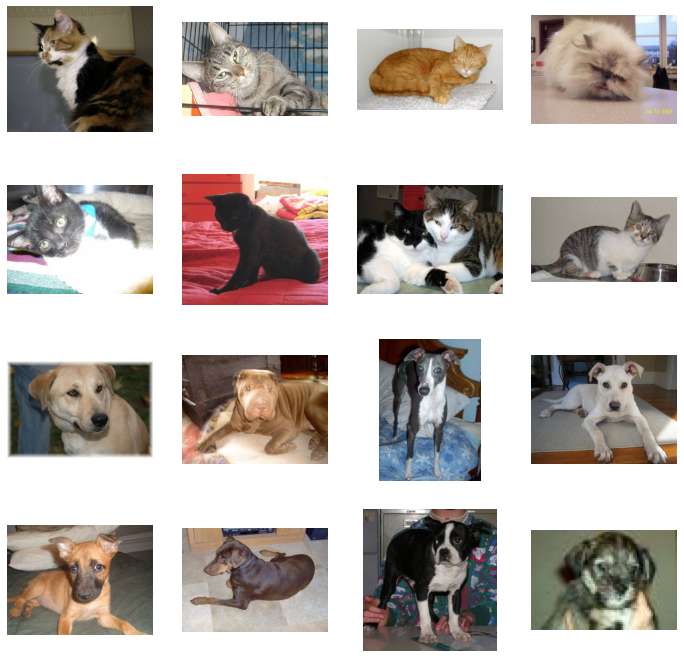

In [ ]:
#이미지 확인하기
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#모델 구성하기
#이제 TensorFlow를 이용해서 합성곱 신경망의 모델을 구성합니다.
#summary() 메서드를 이용해서 신경망의 구조를 확인할 수 있습니다.

import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
#모델 컴파일하기
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


모델 컴파일 단계에서는 compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정합니다.

말과 사람 이미지 분류하기 예제에서와 같이 손실 함수로 ‘binary_crossentropy’를 사용했습니다.

출력층의 활성화함수로 ‘sigmoid’를 사용했고, 이는 0과 1 두 가지로 분류되는 ‘binary’ 분류 문제에 적합하기 때문입니다.

또한, 옵티마이저로는 RMSprop을 사용했습니다.

RMSprop (Root Mean Square Propagation) Algorithm은 훈련 과정 중에 학습률을 적절하게 변화시킵니다.

# 이미지 데이터 전처리하기
훈련을 진행하기 전, tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 이용해서 데이터 전처리를 진행합니다.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


우선 ImageDataGenerator 객체의 rescale 파라미터를 이용해서 모든 데이터를 255로 나누어준 다음,

flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만듭니다.

첫번째 인자로 이미지들이 위치한 경로를 입력하고, batch_size, class_mode를 지정합니다.

target_size에 맞춰서 이미지의 크기가 조절됩니다.

In [ ]:
#모델 훈련하기
#fit() 메서드는 앞에서 구성한 Neural Network 모델을 훈련합니다.

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
100/100 - 17s - loss: 0.8186 - accuracy: 0.5385 - val_loss: 0.6723 - val_accuracy: 0.6150 - 17s/epoch - 175ms/step
Epoch 2/100
100/100 - 8s - loss: 0.6569 - accuracy: 0.6250 - val_loss: 0.5940 - val_accuracy: 0.6840 - 8s/epoch - 82ms/step
Epoch 3/100
100/100 - 8s - loss: 0.5640 - accuracy: 0.7140 - val_loss: 0.5865 - val_accuracy: 0.6890 - 8s/epoch - 81ms/step
Epoch 4/100
100/100 - 10s - loss: 0.4846 - accuracy: 0.7695 - val_loss: 0.5776 - val_accuracy: 0.7240 - 10s/epoch - 99ms/step
Epoch 5/100
100/100 - 8s - loss: 0.3790 - accuracy: 0.8340 - val_loss: 0.5654 - val_accuracy: 0.7220 - 8s/epoch - 81ms/step
Epoch 6/100
100/100 - 8s - loss: 0.2966 - accuracy: 0.8730 - val_loss: 0.6468 - val_accuracy: 0.7220 - 8s/epoch - 82ms/step
Epoch 7/100
100/100 - 8s - loss: 0.1949 - accuracy: 0.9225 - val_loss: 1.1429 - val_accuracy: 0.6750 - 8s/epoch - 81ms/step
Epoch 8/100
100/100 - 9s - loss: 0.1601 - accuracy: 0.9435 - val_loss: 0.8022 - val_accuracy: 0.7110 - 9s/epoch - 90ms/step
Epo

훈련과 테스트를 위한 데이터셋인 train_generator, validation_generator를 입력합니다.

epochs는 데이터셋을 한 번 훈련하는 과정을 의미합니다.

steps_per_epoch는 한 번의 에포크 (epoch)에서 훈련에 사용할 배치 (batch)의 개수를 지정합니다.

validation_steps는 한 번의 에포크가 끝날 때, 테스트에 사용되는 배치 (batch)의 개수를 지정합니다.

아래와 같은 훈련 과정을 확인할 수 있습니다.



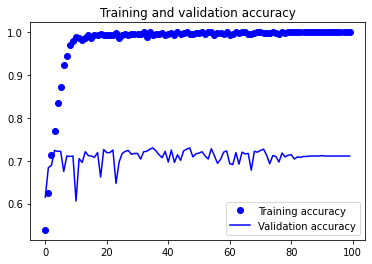

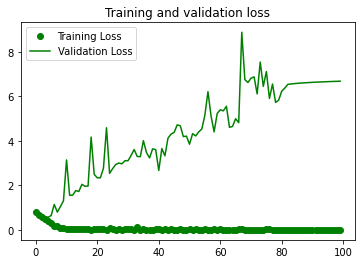

In [ ]:
#정확도와 손실 확인하기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Matplotlib 라이브러리를 이용해서 훈련 과정에서 에포크에 따른 정확도와 손실을 출력합니다.

아래와 같은 이미지가 출력됩니다.

20회 에포크에서 훈련 정확도는 1.0에 근접한 반면, 테스트의 정확도는 100회 훈련이 끝나도 0.7 수준에 머물고 있습니다.

이러한 현상을 과적합 (Overfitting)이라고 합니다.

#테스트 이미지 분류하기
아래의 테스트 이미지를 사용해서 훈련된 모델이 개와 고양이 이미지를 분류할 수 있는지 확인해 보겠습니다.

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
#import keras.utils
uploaded=files.upload()

for fn in uploaded.keys():

  path='./' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving classifying_the_cats_and_dogs_09.png to classifying_the_cats_and_dogs_09.png
1/1 [==============================] - 0s 173ms/step
[1.]
classifying_the_cats_and_dogs_09.png is a dog
